In [2]:
import pandas as pd
from babel.util import missing
from django.db.models.expressions import result

# Loading the dataset
data = pd.read_csv('train.csv')

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


The dataset from the Kaggle competition "House Prices: Advanced Regression Techniques" aims to predict the sale price of houses based on a variety of features. It contains 79 explanatory variables that describe various characteristics of homes in Ames, Iowa, including structural features, neighborhood information, and other factors influencing market value.

Dataset Overview:

1. Total Rows: The training set includes 1460 observations.


2. Sale Price: This is the target variable, representing the house's final sale price.


3. Features: 79 attributes, both numeric and categorical, covering:

Structural Features: Foundation type, roof style, exterior materials, and overall quality.

Land and Location Details: Lot frontage, area, and neighborhood.

Interior Features: Basement size and quality, number of rooms, and kitchen quality.

Garage and Outdoor Spaces: Garage size, porch area, and deck square footage.




Key Aspects:

1. Target Variable: SalePrice, the dependent variable measured in dollars.


2. Feature Types:

Numeric: Continuous values like GrLivArea (above-ground living area) and LotArea.

Categorical: Non-numeric labels such as Neighborhood, ExterQual (exterior quality), and GarageType.



3. Missing Data: Some features, like Alley, PoolQC, and Fence, have considerable missing data, requiring preprocessing to manage properly.



This dataset is an excellent resource for practicing advanced regression techniques, feature engineering, and predictive modeling. It provides a challenging opportunity to predict house prices with high accuracy using data analysis and machine learning methods.

In [3]:
import os
os.getcwd()


'C:\\Users\\DELL\\ML'

In [4]:
csv_filename = 'train.csv'
csv_path = os.path.join(os.getcwd(), csv_filename)
print(csv_path)

C:\Users\DELL\ML\train.csv


In [5]:
import os
csv_filename = 'train.csv'
csv_path = os.path.join(os.getcwd(), csv_filename)

# checking if the file path exists
if os.path.isfile(csv_path):
    print(f"'{csv_filename}' already exists at {csv_path}.")
else:
    print(f"'{csv_filename}' does not exist at {csv_path}.")


'train.csv' already exists at C:\Users\DELL\ML\train.csv.


In [7]:
import pandas as pd

file_path =r'C:\Users\DELL\ML\train.csv'

# loading the dataset
data = pd.read_csv(file_path)

feature_types = data.dtypes # Data type for all columns
target_variable = "Saleprice" if "Saleprice" in data.columns else None

# displaying descriptive statistics for GrLivArea
feature_name = 'GrLivArea'
feature_stats = data[feature_name].describe() if feature_name in data.columns else None

# outputting the results
print("feature_types:")
print(feature_types)
print("\nTarget variable:", target_variable)
print(f"\nStatistics for {feature_name}:")
print(feature_stats)


feature_types:
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

Target variable: None

Statistics for GrLivArea:
count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64


(Id                0.000000
 MSSubClass        0.000000
 MSZoning          0.000000
 LotFrontage      17.739726
 LotArea           0.000000
                    ...    
 MoSold            0.000000
 YrSold            0.000000
 SaleType          0.000000
 SaleCondition     0.000000
 SalePrice         0.000000
 Length: 81, dtype: float64,
 Id               0
 MSSubClass       0
 MSZoning         0
 LotArea          0
 Street           0
                 ..
 MoSold           0
 YrSold           0
 SaleType         0
 SaleCondition    0
 SalePrice        0
 Length: 63, dtype: int64)

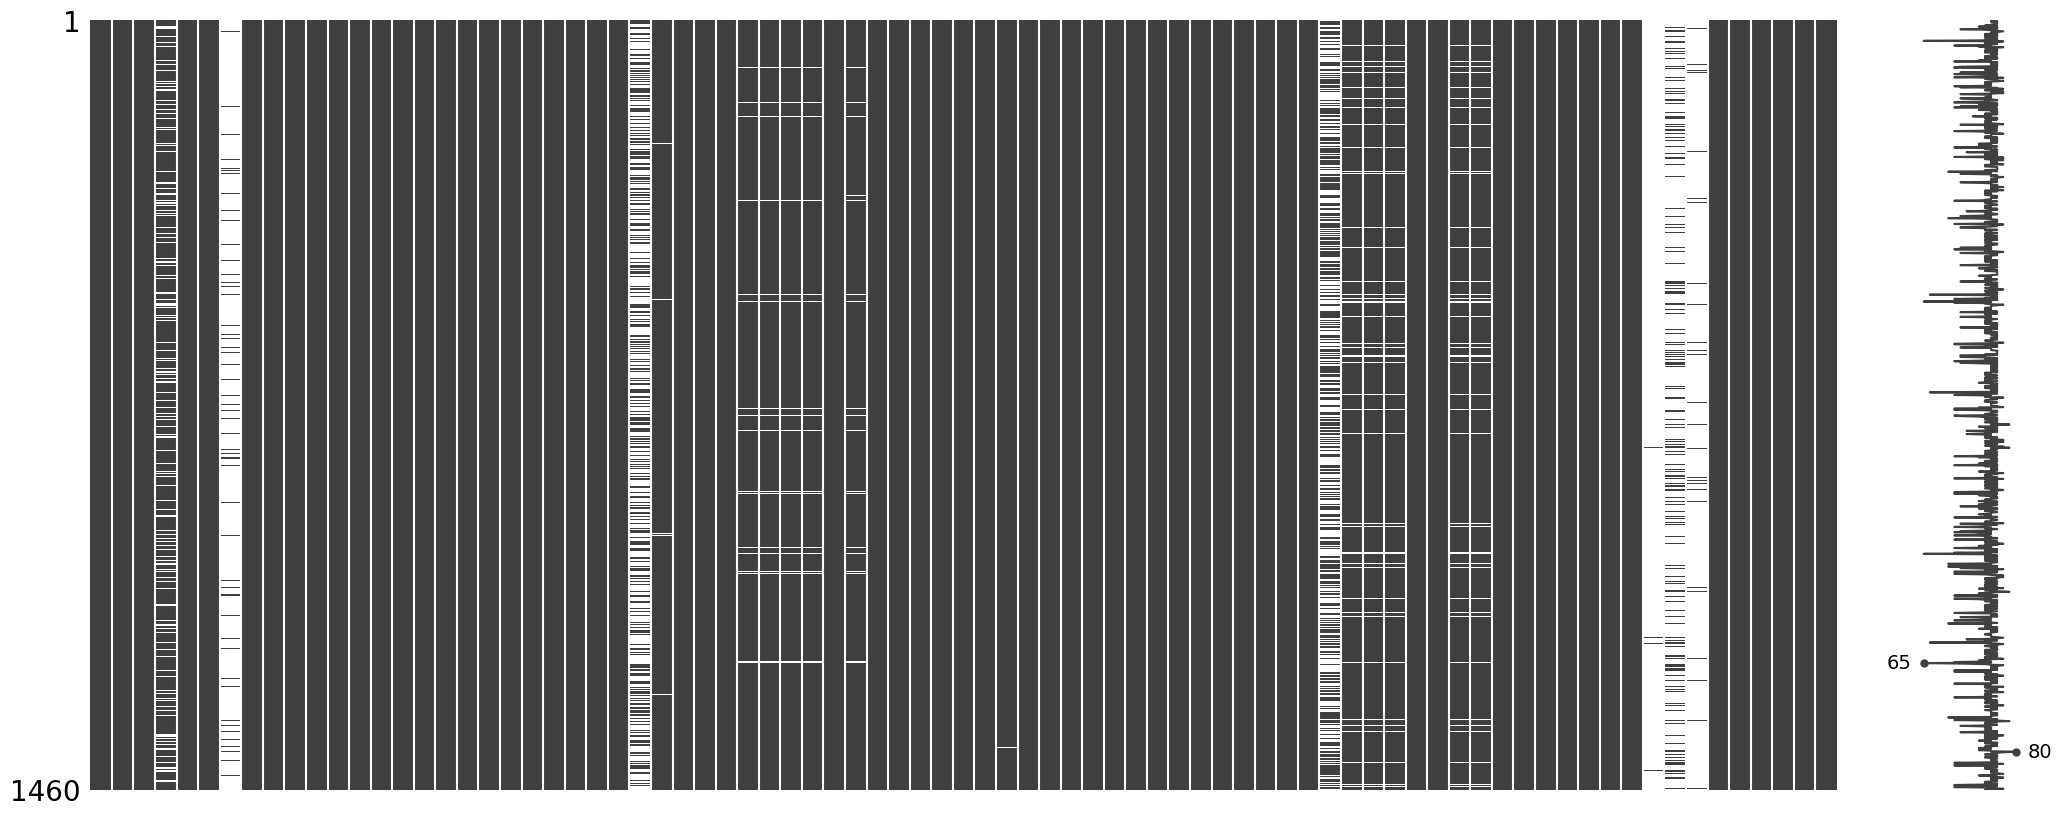

In [13]:
import missingno as msno
import pandas as np

file_path =r'C:\Users\DELL\ML\train.csv'
data = pd.read_csv(file_path)

# visualizing the missing data
msno.matrix(data)

# calculating the percentages of missing values in each column
missing_percentage = data.isnull().mean() * 100
# Removing columns with 5 or more missing values
data_cleaned = data.dropna(axis=1, thresh=data.shape[0]-5)

# removing rows with missing data
data_cleaned = data_cleaned.dropna(axis=0)

# outputting the results
missing_percentage, data_cleaned.isnull().sum()

Kurtosis is a statistical metric that characterizes the shape of a data distribution, focusing on the "tailedness" or the presence and severity of outliers compared to a normal distribution. It examines how the distribution's tails and peak compare to those of a normal distribution.

Types of Kurtosis:

1. Mesokurtic: Represents a distribution with a kurtosis of 3, typical of a normal distribution, indicating a moderate level of outliers.


2. Leptokurtic: Indicates a distribution with kurtosis greater than 3, featuring heavy tails and more outliers than a normal distribution.


3. Platykurtic: Describes a distribution with kurtosis less than 3, having lighter tails and fewer outliers than a normal distribution.

In [16]:
import pandas as pd
from scipy.stats import skew

feature = 'GrLivArea'

# Calculating skewness using scipy
feature_skewness = skew(data[feature], nan_policy='omit') #Omits NaN values
print(f"Skewness of {feature}: is {feature_skewness}")
# calculating skewness using pandas
feature_skewness_pd = data[feature].skew()
print(f"Skewness of {feature}: is {feature_skewness_pd}")

Skewness of GrLivArea: is 1.365155954773434
Skewness of GrLivArea: is 1.3665603560164552


Skewness is a statistical measure that describes the asymmetry of a data distribution around its mean.

Positive Skew (Right-Skewed): The tail on the right side of the distribution is longer or has more extreme values.

Negative Skew (Left-Skewed): The tail on the left side is longer or has more extreme values.

Zero Skew (Symmetric): The distribution is perfectly balanced, with tails of equal length on both sides of the mean.


Skewness helps identify the direction and degree of deviation from a normal distribution.

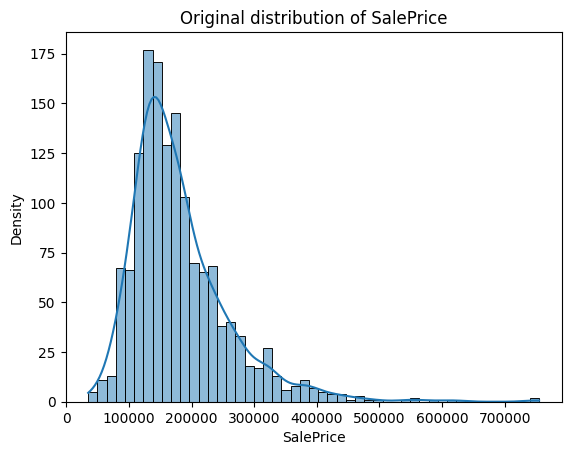

Kurtosis of SalePrice: is 6.509812011089439
Skewness of SalePrice: is 1.880940746034036


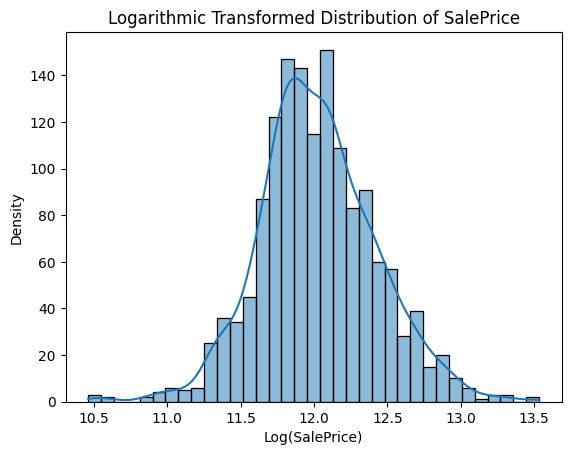

Skewness of SalePrice: is 0.12122191311528363
Kurtosis of SalePrice: is 0.8026427107468055


In [22]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

feature = 'SalePrice'
# displaying the original distribution of the dependent variable
sns.histplot(data[feature], kde=True)
plt.title('Original distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Density')
plt.show()

# calculating skewness and kurtosis.
original_kurtosis = kurtosis(data[feature], nan_policy='omit')
original_skew = skew(data[feature], nan_policy='omit')

print(f"Kurtosis of {feature}: is {original_kurtosis}")
print(f"Skewness of {feature}: is {original_skew}")

# applying the logarithmic transformation of the dependent variable
data['log_SalePrice'] = np.log1p(data[feature])

# outputting the result
sns.histplot(data['log_SalePrice'], kde=True)
plt.title('Logarithmic Transformed Distribution of SalePrice')
plt.xlabel('Log(SalePrice)')
plt.ylabel('Density')
plt.show()

# calculating skew and kurtosis
transformed_skew = skew(data['log_SalePrice'], nan_policy='omit')
transformed_kurtosis =kurtosis(data['log_SalePrice'], nan_policy='omit')

print(f"Skewness of {feature}: is {transformed_skew}")
print(f"Kurtosis of {feature}: is {transformed_kurtosis}")

In [24]:
# displaying data types and first few rows
data_types = data.dtypes
data_head = data.head(50)

data_types, data_head


(Id                 int64
 MSSubClass         int64
 MSZoning          object
 LotFrontage      float64
 LotArea            int64
                   ...   
 YrSold             int64
 SaleType          object
 SaleCondition     object
 SalePrice          int64
 log_SalePrice    float64
 Length: 82, dtype: object,
     Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
 0    1          60       RL         65.0     8450   Pave   NaN      Reg   
 1    2          20       RL         80.0     9600   Pave   NaN      Reg   
 2    3          60       RL         68.0    11250   Pave   NaN      IR1   
 3    4          70       RL         60.0     9550   Pave   NaN      IR1   
 4    5          60       RL         84.0    14260   Pave   NaN      IR1   
 5    6          50       RL         85.0    14115   Pave   NaN      IR1   
 6    7          20       RL         75.0    10084   Pave   NaN      Reg   
 7    8          60       RL          NaN    10382   Pave   NaN      IR1   
 8

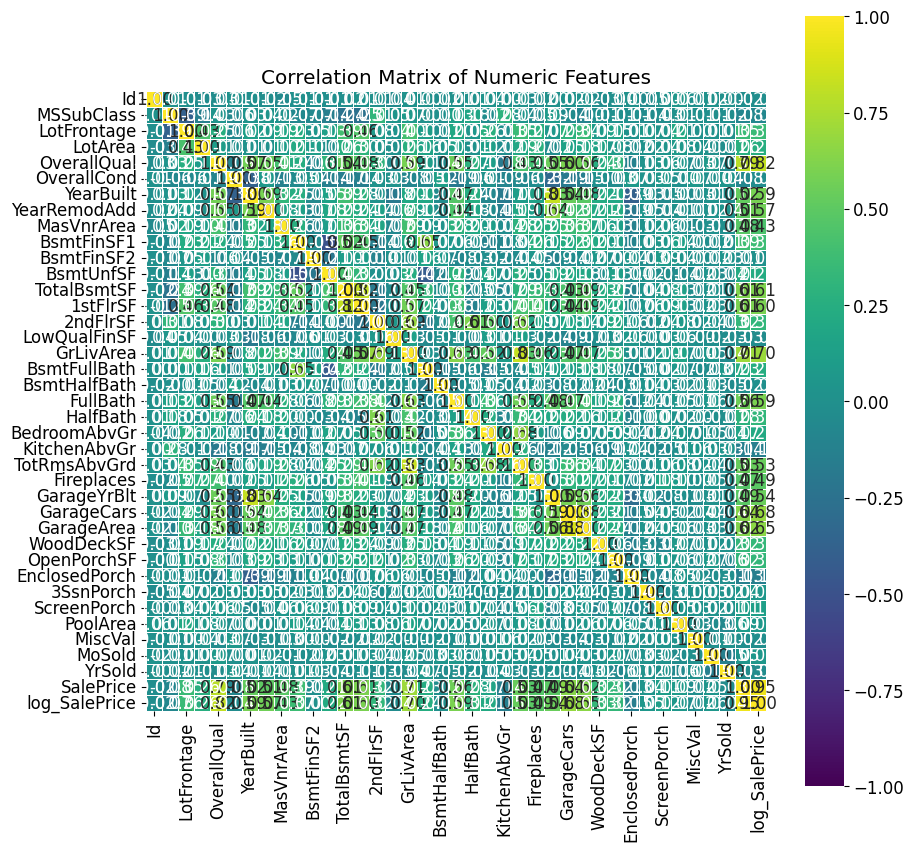

In [50]:
# selecting only the numeric columns from the dataset
numeric_data = data.select_dtypes(include=['number'])
# calculating the correlation matrix for numeric columns
corr_matrix = numeric_data.corr()

# creating a heatmap of the correlation matrix
plt.figure(figsize = (10,10))
sns.heatmap(corr_matrix, annot=True, cmap="viridis", fmt='.2f', linewidths=.5, square=True, vmax=1, vmin=-1, center=0)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [43]:
# sorting the correlation matrix by the absolute correlation with 'SalePrice'
correlation_with_target = corr_matrix['SalePrice'].abs().sort_values(ascending=False)

# Selecting top 10 features with highest correlation
top_10_features = correlation_with_target[1:11]

top_10_features

log_SalePrice    0.948374
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
Name: SalePrice, dtype: float64

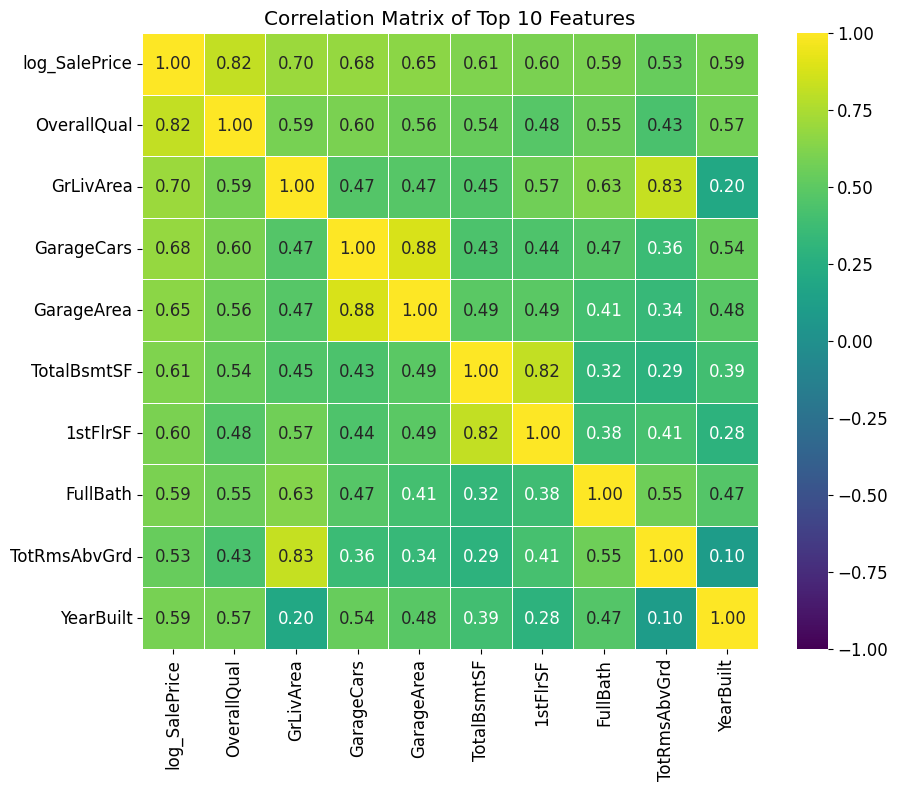

In [47]:
# submitting the dataset with top 10 features and creating the correlation matrix
top_10_corr_matrix = data[top_10_features.index].corr()

# plotting the heatmap
plt.figure(figsize = (10,8))
plt.rcParams.update({'font.size': 12})
sns.heatmap(top_10_corr_matrix, annot=True, cmap="viridis", fmt='.2f', linewidths=.5, vmin=-1, square=True, vmax=1, center=0)
plt.title('Correlation Matrix of Top 10 Features')
plt.show()

主な特徴とその重要性

1. OverallQual: 家の全体的な品質を反映し、価格に影響を与える最も重要な要素です。

2. GrLivArea: 地上の居住スペースを平方フィートで表します。面積が大きいほど、通常は価格が高くなります。

3. GarageCars: ガレージに収容できる車の数を示します。ガレージのサイズと家の規模に相関します。

4. TotRmsAbvGrd: 地上階の部屋の総数を示します。部屋が多いほど、不動産価値が高くなります。

5. 1stFlrSF: 1 階の床面積。高価な家では、通常、サイズが大きいのが一般的です。

6. ExterCond: 家の外観の状態を示します。状態が良いほど、市場価値が高くなります。

7. FullBath: フルバスルームの数。フルバスルームが 2 つ以上ある家は、通常、価格が高くなります。

8. 暖炉: 家にある暖炉の数。贅沢さの指標となることが多く、価値にプラスの影響を与えます。

9. BsmtFinSF1: 完成した地下室の面積。不動産全体の価値に寄与します。

10. LotArea: 敷地面積の合計を平方フィートで表します。敷地面積が大きいほど、家が高価になる傾向があります。

これらの特徴は、家の価値を決定する上で重要な役割を果たします。

In [45]:
# Finding pairs of features with high correlation
high_corr_pairs = top_10_corr_matrix.stack().sort_values(ascending=False)

# filtering pairs with correlation coefficient higher than 0.8
high_corr_pairs = high_corr_pairs[(high_corr_pairs > 0.8) & (high_corr_pairs < 1)]

# show top 3 pairs
high_corr_pairs.head(3)

GarageCars    GarageArea    0.882475
GarageArea    GarageCars    0.882475
TotRmsAbvGrd  GrLivArea     0.825489
dtype: float64